In [11]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [12]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [13]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E46D7E668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000024E46EE85C0>], dtype=object)

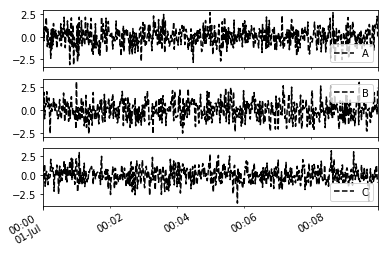

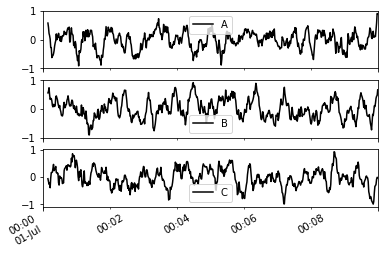

In [14]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--',subplots=True)
r.mean().plot(style = 'k',subplots=True)

In [15]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.759282,0.047308,0.853093
2016-07-01 00:00:02,0.307303,0.759767,0.245828
2016-07-01 00:00:03,0.543260,0.249822,0.598262
2016-07-01 00:00:04,0.546659,0.170200,0.059823
2016-07-01 00:00:05,0.611670,0.301574,-0.118650
2016-07-01 00:00:06,0.923178,0.372456,0.002127
2016-07-01 00:00:07,0.818578,0.683126,0.076811
2016-07-01 00:00:08,0.476626,0.711490,-0.006439
2016-07-01 00:00:09,0.538781,0.654527,-0.224874


In [16]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [17]:
df.head()

,A,B,C,D
2016-06-06,-1.550356,0.377391,0.159932,1.392475
2016-06-07,1.973769,-0.068164,-0.338951,-1.393894
2016-06-08,0.731462,1.414751,-2.003137,-1.757399
2016-06-09,0.379900,-1.608747,-1.480860,-0.622494
2016-06-10,0.552582,-0.275048,1.703392,-0.412270


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E46718908>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000024E46FB5828>], dtype=object)

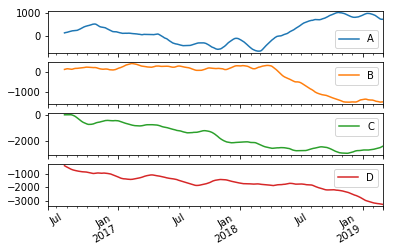

In [18]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [19]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.960294,1.307364,0.885015,1.063288


In [20]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-0.563472,0.343309,-0.009543,0.695528
2016-06-08,0.009311,0.803532,-0.733747,-0.122587
2016-06-09,0.390677,0.631457,-1.466064,-0.687269
2016-06-10,0.730013,0.473202,-1.564776,-1.108531


In [21]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?
# Expanding window is appropriate when values from the past are needed.

In [22]:
# EWMA
# Why use EWMA?

# The only difference between these two types of moving average is the sensitivity each one shows to changes in the data 
# used in its calculation.
# More specifically, the exponential moving average (EMA) gives a higher weighting to recent values than the simple moving 
# average (SMA) does, while the SMA assigns equal weighting to all values

In [23]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

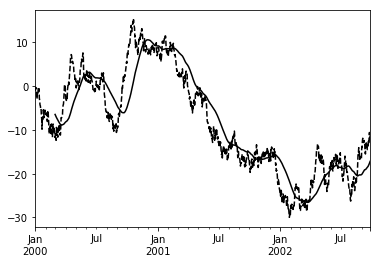

In [25]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s = s.cumsum()
r = s.rolling(window=60)
s.plot(style='k--')
r.mean().plot(style='k')

C:\Users\Naveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=2,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


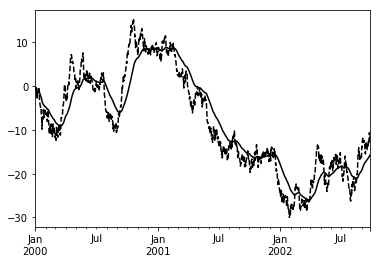

In [27]:
e = pd.ewma(s, span = 60, min_periods = 2)
s.plot(style='k--')
e.plot(style='k')